### Import Module

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series
import numpy as np
!pip install klib
!pip install optuna
!pip install bayesian-optimization
!pip install catboost
!pip install -q -U keras-tuner

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
plt.rc('font', family='AppleGothic')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False 


# EDA
import klib


# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from gensim.models import word2vec
import kerastuner as kt

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization


# Modeling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
import optuna


# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss


# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm, tqdm_notebook
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
!pip install shap
import tensorflow as tf
from tensorflow import keras
import joblib
print(tf.__version__)
import gc

  Using cached optuna-2.10.0-py3-none-any.whl (308 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached autopage-0.4.0-py3-none-any.whl (20 kB)
  Using cached pyperclip-1.8.2.tar.gz (20 kB)
  Using cached pyreadline3-3.3-py3-none-any.whl (95 kB)
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11112 sha256=b054c077f2639833f4b473b0ca3e770564acbe3ef7f3e3547a1a23450c712683
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Using cached bayesian-optimization-1.2.0.tar.gz (14 kB)
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11690 sha256=8fcf5286cbe98008b048af24499e0ed7f563049c03aa0092ff37a63fd8b2c1df
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\37\fa\19\f93e793d3944567a60b3ab93b446cf7370cc82c60c1d1c613f
Successfully built bayesian-optimization


ModuleNotFoundError: No module named 'gensim'

# SUBMISSION ENSEMBLE

In [3]:
rank_1=pd.read_csv("1st_submission.csv")
rank_2=pd.read_csv("2nd_submission.csv")
rank_3=pd.read_csv("3rd_submission.csv")
rank_123=pd.read_csv("123_rankfinal_submissions.csv")
CV_LGBM=pd.read_csv("submission_semi_FINAL.csv")
diff_LGBM=pd.read_csv("submission_lgbm_semi_diff_FINAL.csv")
Ensemble_model=pd.read_csv("ENSEMBLE_MODEL.csv")
BEST_model=pd.read_csv("best_model.csv")
dnn_random=pd.read_csv("dnn_random.csv")
DNN=pd.read_csv("submission_DNN_semi_FINAL.csv")
LR=pd.read_csv("submission_LR_semi_FINAL.csv")
LGBM=pd.read_csv("submission_LGBM_semi_FINAL.csv")
CAT=pd.read_csv("submission_CAT_semi_FINAL.csv")
ADA=pd.read_csv("submission_ADA_semi_FINAL.csv")
XGB=pd.read_csv("submission_XGB_semi_FINAL.csv")
RF=pd.read_csv("submission_RF_semi_FINAL.csv")
good_scores=pd.read_csv("good_scores.csv")
good_scores1=pd.read_csv("good_scores 1.csv")
real_best=pd.read_csv("best+diff.csv")
real_BEST_model=pd.read_csv("dif_xgb_rb_bmfinal_submissions.csv")
junks=pd.read_csv("junks.csv")
junks2=pd.read_csv("junks2.csv")
junks3=pd.read_csv("junks3.csv")
junks4=pd.read_csv("junks4.csv")
junks5=pd.read_csv("junks5.csv")

In [18]:
ensemble_list=[rank_1, rank_2, rank_3, rank_123, CV_LGBM, diff_LGBM,Ensemble_model, 
               BEST_model,dnn_random, DNN,LR, LGBM, CAT, XGB, RF, good_scores, good_scores1,
               real_best,real_BEST_model, junks,junks2,junks3,junks4,junks5,#ADA,
               ]

In [19]:
label=["rank_1 (0.891)", "rank_2 (0.884)", "rank_3(0.883)","rank_123(0.89490)",
       "CV_LGBM(0.88466)", "diff_LGBM(0.89652)", "Ensemble_model(0.89567)", 
       "BEST_model(0.89948)", "dnn_random(0.89310)", "DNN(0.89369)", "LR(0.88525)",
       "LGBM(0.8992)", "CAT(0.89888)",  "XGB(0.89993)","RF(0.89917)",  "good_scores(0.89963)",
       "good_scores1(0.90047)","real_best(0.90166)", "real_BEST(0.90188)" ,"junks(0.89337)",
       "junks2(0.89597)","junks3(0.89741)","junks4(0.89984)","junks5(0.90130)",#"ADA(0.89049)",
      ]

In [20]:
score=[]
for s in label:
    o=s.split("(")[1]; k=o.split(")")[0]
    score.append(float(k))

In [21]:
df1=pd.DataFrame(ensemble_list[0]["ID"])
for i in ensemble_list:
    df1=df1.merge(i,on="ID")

In [22]:
data=df1.iloc[:,1:]
data.columns=label

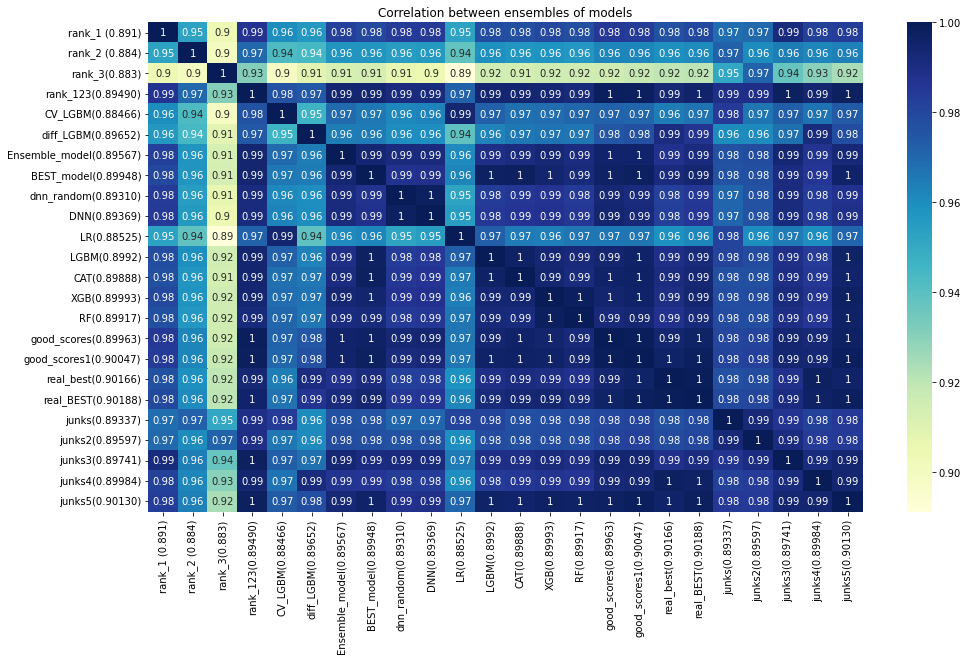

In [23]:
# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (16,9))
g = sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
g.set_title("Correlation between ensembles of models")
plt.show()

- ADA BOOST 는 상관계수가 너무 작아 시각화에서 제외 상관계수가 0.55근처를 유지함

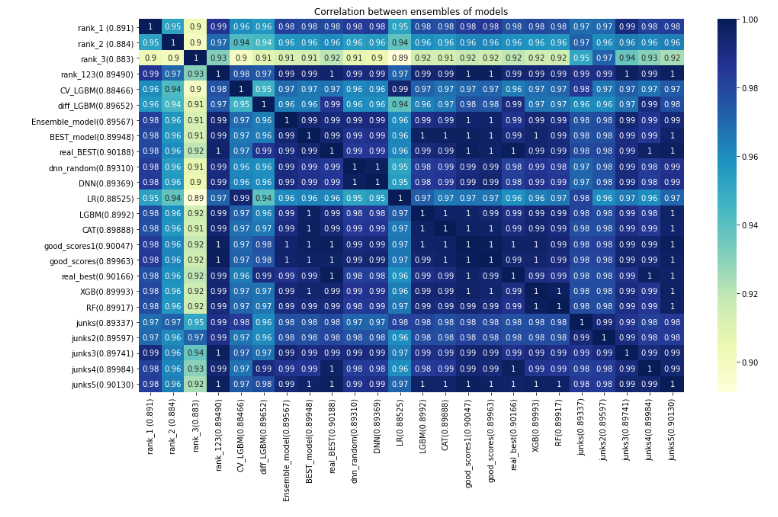

In [24]:
# Mean agreement
(data.corr().sum()-1)/(data.corr().shape[0]-1)

rank_1 (0.891)             0.972899
rank_2 (0.884)             0.955500
rank_3(0.883)              0.918366
rank_123(0.89490)          0.987411
CV_LGBM(0.88466)           0.965166
diff_LGBM(0.89652)         0.963972
Ensemble_model(0.89567)    0.981900
BEST_model(0.89948)        0.982522
dnn_random(0.89310)        0.977817
DNN(0.89369)               0.978311
LR(0.88525)                0.959886
LGBM(0.8992)               0.982363
CAT(0.89888)               0.982119
XGB(0.89993)               0.982834
RF(0.89917)                0.981578
good_scores(0.89963)       0.985657
good_scores1(0.90047)      0.986080
real_best(0.90166)         0.982367
real_BEST(0.90188)         0.984331
junks(0.89337)             0.977461
junks2(0.89597)            0.977264
junks3(0.89741)            0.985127
junks4(0.89984)            0.982724
junks5(0.90130)            0.986507
dtype: float64

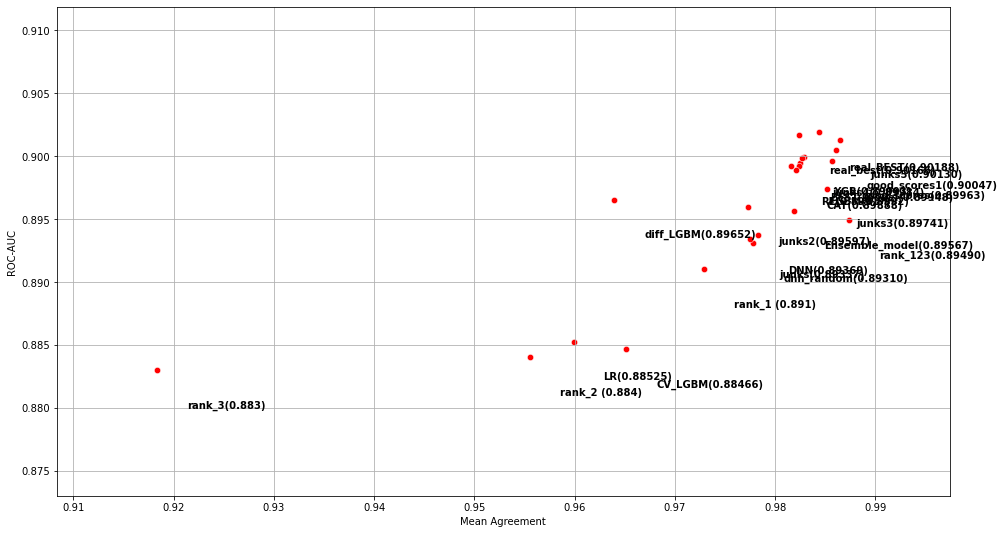

In [25]:
corr = (data.corr().sum()-1)/(data.corr().shape[0]-1)
names = corr.index
aucs = np.array(score).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(16,9))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

- 4가지 모델을 사용했을 때 가장 점수가 높았음
- real_BEST_model 이 가장 점수가 높음

In [ ]:
selected_ensemble_list=[#rank_1,
                        #rank_2,
                        #rank_3,
                        #rank_123,
                        #CV_LGBM,
                        diff_LGBM,
                        #Ensemble_model,                    
                        BEST_model,
                        #real_BEST_model,
                        #dnn_random,
                        #DNN,
                        #LR,
                        #LGBM,
                      #CAT,
                      #ADA,
                      #good_scores1,
                      #good_scores,
                      real_best,
                       XGB,
                       #RF,
                    #junks,
                        #junks2,
                        #junks3,
                    #junks4,
                   #junks5
               ]

In [ ]:
df1=pd.DataFrame(ensemble_list[0]["ID"])
for i in selected_ensemble_list:
    df1=df1.merge(i,on="ID")
data2=df1.iloc[:,1:]

In [ ]:
def ensemble_submission(submissions,p,power=None,name=""):
    if p==0 and power==[]:
        pred=gmean(submissions,axis=1)
        
    elif p!=0 and power==[]:
        pred = (np.sum(np.array(submissions)**p, axis=1) / len(submissions.columns))**(1/p)
    
    else: 
        for i,a in enumerate(power):
            submissions.iloc[:,i]=submissions.iloc[:,i]*a
        pred=np.sum(np.array(submissions),axis=1)/sum(power)
    pd.DataFrame({"ID":df1["ID"],"STATUS":pred}).to_csv(name+"final_submissions.csv",index=False)
    return pd.DataFrame({"ID":df1["ID"],"STATUS":pred})

- p값이 1.5일 때 가장 점수가 높음, 가중평균보다 점수가 높음.

- public_score - > 0.90188
- 최종 앙상블 30회 정도 시도

In [ ]:
ensemble_submission(data2, 1.5, power=[], name="REAL_best")